In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Applications/anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [19]:
# Set features. This will also be used as your x values.
#only keep features that don't include "err"
X= df[["koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec","koi_period", "koi_time0bk","koi_slogg", "koi_srad", "ra", "dec", "koi_kepmag"]]
y=df["koi_disposition"]
X.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,162.513840,4.467,0.927,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,175.850252,4.544,0.868,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,170.307565,4.564,0.791,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,171.595550,4.438,1.046,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,172.979370,4.486,0.972,296.28613,48.224670,15.714


/Applications/anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.17419733 0.19118203 0.13195861 0.06509313 0.07693949 0.07416543
 0.06200723 0.05403874 0.05939794 0.05551241 0.05550766]


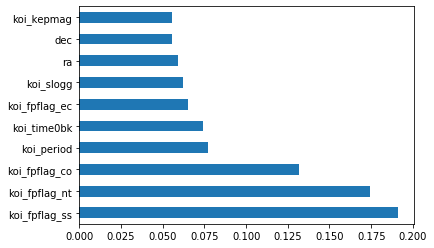

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [21]:
# Keep the top ten features:
X= df[["koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_period", "koi_time0bk","koi_slogg", "koi_srad", "ra", "koi_kepmag"]]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [22]:
from sklearn.model_selection import train_test_split
y=df["koi_disposition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [23]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_period,koi_time0bk,koi_slogg,koi_srad,ra,koi_kepmag
4002,0,0,1,99.673478,219.334830,4.777,0.492,293.05801,15.801
4246,0,1,0,0.592244,131.654831,4.664,0.591,290.28094,15.653
548,0,1,1,9.991625,137.447816,4.338,1.096,301.04239,14.039
3953,0,1,0,178.412990,218.225235,4.346,1.148,288.32785,13.944
2362,0,0,0,45.294223,138.678725,4.347,1.044,285.67938,10.961


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [24]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Train the Model



In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.7827579629982834
Testing Data Score: 0.7923340961098398


/Applications/anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [26]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'C': [1,5,10,100,1000],
              }

grid = GridSearchCV(model, param_grid, verbose=5)

In [27]:
# Train the model with GridSearch
best_clf = grid.fit(X_train_scaled, y_train)

/Applications/anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Applications/anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Applications/anaconda3/envs/PythonWebMongo/lib/pyth

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.796, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.775, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.774, total=   0.0s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.796, total=   0.0s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.775, total=   0.0s
[CV] C=5 .............................................................
[CV] ................................. C=5, score=0.774, total=   0.0s
[CV] C=10 ............................................................
[CV] ............

/Applications/anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Futur

In [28]:
print(best_clf.best_params_)
print(f"Best Fit GridSearch Score: {best_clf.best_score_}")
print(f"Best Fit Testing Data Score: {best_clf.score(X_test_scaled, y_test)}")
print(f"Unfitted Testing Data Score: {model.score(X_test_scaled, y_test)}")

{'C': 5}
Best Fit GridSearch Score: 0.7816135800114439
Best Fit Testing Data Score: 0.7934782608695652
Unfitted Testing Data Score: 0.7923340961098398


# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)